In [1]:
import pandas
import numpy
d = pandas.read_table("data.csv", sep=",")
d

,momid3,idx,stateres,dmage,dmeduc,dbirwt,smoke,male,year,married,black
0,1120,1,3,29,12,3062,0,0,3,1,0
1,1120,2,3,30,12,3317,1,1,4,1,0
2,1121,1,3,29,16,4026,0,1,3,1,0
3,1121,2,3,33,16,3657,0,1,8,1,0
4,1122,1,3,31,14,3260,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
13149,141805,2,48,21,12,3770,0,1,8,1,0
13150,141806,1,48,35,14,3770,0,1,7,1,0
13151,141806,2,48,36,14,3745,0,1,8,1,0
13152,141807,1,48,26,11,4281,1,1,7,0,0


In [2]:
d.columns.values

array(['momid3', 'idx', 'stateres', 'dmage', 'dmeduc', 'dbirwt', 'smoke',
       'male', 'year', 'married', 'black'], dtype=object)

In [3]:
d2= d.copy()
d2=d2[['momid3','dmage','dbirwt','smoke','male','year']]

In [5]:
len(pandas.unique(d2.momid3))

6372

In [14]:
m = d2.momid3.value_counts().value_counts()
m

2    5962
3     410
Name: momid3, dtype: int64

Text(0.5, 1.0, 'Grafico a torta numero di figli per madre')

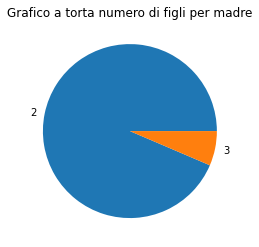

In [15]:
import matplotlib.pyplot as plt
plt.pie(m,labels =['2','3'])  # grafico a torta
plt.title('Grafico a torta numero di figli per madre')

In [6]:
anni={0:1990,1:1991,2:1992,3:1993,4:1994,5:1995,6:1996,7:1997,8:1998}
d2['anno'] = d2['year'].map(anni)
d2.anno.value_counts()

1994    1960
1995    1935
1993    1889
1992    1799
1996    1795
1997    1363
1998     962
1991     861
1990     590
Name: anno, dtype: int64

Text(0.5, 1.0, 'Istogramma degli anni nascita')

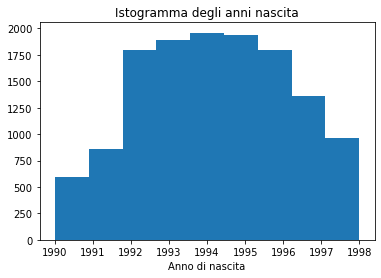

In [22]:
plt.hist(d2.anno, bins=9) # istogramma
plt.xlabel('Anno di nascita')
plt.title('Istogramma degli anni nascita')

Text(0.5, 1.0, 'Boxplot degli anni nascita')

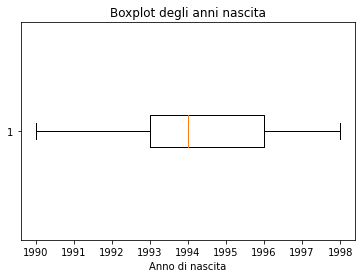

In [24]:
plt.boxplot(d2.anno, vert=False) # boxplot
plt.xlabel('Anno di nascita')
plt.title('Boxplot degli anni nascita')

In [7]:
d2.smoke.value_counts()

0    11445
1     1709
Name: smoke, dtype: int64

Text(0.5, 1.0, 'Grafico a torta stato fumo della madre')

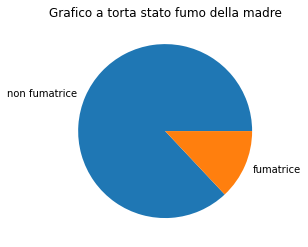

In [20]:
ff=numpy.bincount(d2.smoke)
plt.pie(ff,labels =['non fumatrice','fumatrice']) # grafico a torta
plt.title('Grafico a torta stato fumo della madre')

In [8]:
d2.male.value_counts()

1    6715
0    6439
Name: male, dtype: int64

Text(0.5, 1.0, 'Grafico a torta del genere alla nascita')

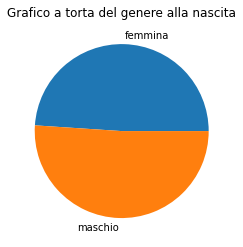

In [21]:
fg=numpy.bincount(d2.male)
plt.pie(fg,labels =['femmina','maschio']) # grafico a torta
plt.title('Grafico a torta del genere alla nascita')

Text(0.5, 1.0, 'Istogramma età della madre')

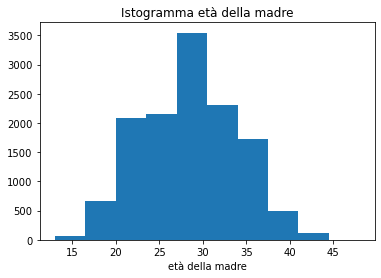

In [16]:
plt.hist(d2.dmage) # istogramma
plt.xlabel('età della madre')
plt.title('Istogramma età della madre')

Text(0.5, 1.0, 'Boxplot età della madre')

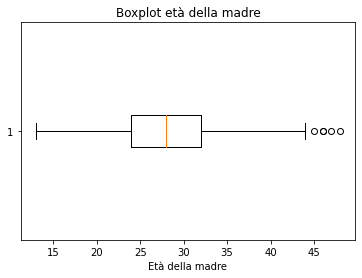

In [17]:
plt.boxplot(d2.dmage, vert=False) # boxplot
plt.xlabel('Età della madre')
plt.title('Boxplot età della madre')

Text(0.5, 1.0, 'Istogramma del peso alla nascita')

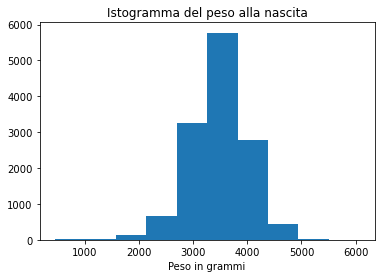

In [18]:
plt.hist(d2.dbirwt) # istogramma
plt.xlabel('Peso in grammi')
plt.title('Istogramma del peso alla nascita')

Text(0.5, 1.0, 'Boxplot del peso alla nascita')

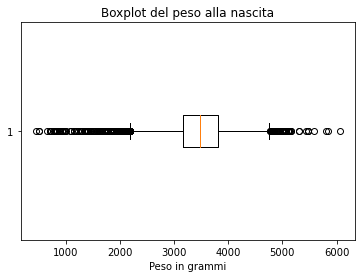

In [19]:
plt.boxplot(d2.dbirwt, vert=False) # boxplot
plt.xlabel('Peso in grammi')
plt.title('Boxplot del peso alla nascita')

In [30]:
d2['anomalia']
d2.anomalia[(d2.dbirwt <= 2500) | (d2.dbirwt >= 4500)] = 1
d2.anomalia[(d2.dbirwt > 2500) & (d2.dbirwt < 4500)] = 0

In [31]:
d2.anomalia.value_counts()

0    12373
1      781
Name: anomalia, dtype: int64

Text(0.5, 1.0, 'Grafico a torta del peso alla nascita')

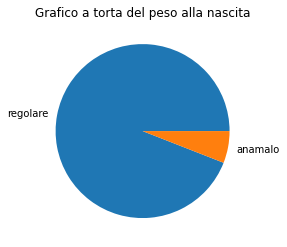

In [33]:
fa=numpy.bincount(d2.anomalia)
plt.pie(fa,labels =['regolare','anamalo']) # grafico a torta
plt.title('Grafico a torta del peso alla nascita')

In [34]:
d2

,momid3,dmage,dbirwt,smoke,male,year,anno,anomalia
0,1120,29,3062,0,0,3,1993,0
1,1120,30,3317,1,1,4,1994,0
2,1121,29,4026,0,1,3,1993,0
3,1121,33,3657,0,1,8,1998,0
4,1122,31,3260,0,0,1,1991,0
...,...,...,...,...,...,...,...,...
13149,141805,21,3770,0,1,8,1998,0
13150,141806,35,3770,0,1,7,1997,0
13151,141806,36,3745,0,1,8,1998,0
13152,141807,26,4281,1,1,7,1997,0


In [35]:
d2['int']=1
x = ['dmage','smoke','male','anno','int']
import statsmodels.api as sm 
mod = sm.Logit(d2['anomalia'], d2[x])
risp = mod.fit()
risp.summary() 

Optimization terminated successfully.
         Current function value: 0.224508
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               anomalia   No. Observations:                13154
Model:                          Logit   Df Residuals:                    13149
Method:                           MLE   Df Model:                            4
Date:                Mon, 22 Feb 2021   Pseudo R-squ.:                0.003252
Time:                        10:00:16   Log-Likelihood:                -2953.2
converged:                       True   LL-Null:                       -2962.8
Covariance Type:            nonrobust   LLR p-value:                 0.0006962
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
dmage          0.0041      0.007      0.586      0.558      -0.010       0.018
smoke          0.3769      0.100      3.776      0.000       0.181       0.573
male           0.1715      0.074      2.311      0.021       0.026       0.317
anno          -0.0110      0.017     -0.642      0.521      -0.045       0.023
int           18.9895     34.236      0.555      0.579     -48.112      86.091
==============================================================================
"""

In [38]:
x2 = ['smoke','male','int']
mod2 = sm.Logit(d2['anomalia'], d2[x2])
risp2 = mod2.fit()
risp2.summary() 

Optimization terminated successfully.
         Current function value: 0.224533
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               anomalia   No. Observations:                13154
Model:                          Logit   Df Residuals:                    13151
Method:                           MLE   Df Model:                            2
Date:                Mon, 22 Feb 2021   Pseudo R-squ.:                0.003140
Time:                        10:37:31   Log-Likelihood:                -2953.5
converged:                       True   LL-Null:                       -2962.8
Covariance Type:            nonrobust   LLR p-value:                 9.101e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
smoke          0.3702      0.098      3.771      0.000       0.178       0.563
male           0.1714      0.074      2.310      0.021       0.026       0.317
int           -2.9088      0.057    -50.644      0.000      -3.021      -2.796
==============================================================================
"""

In [45]:
def y(int,smoke,male):
    return -2.9088 + 0.3702*smoke + 0.1714*male
y1= y(int, 0,0)
numpy.exp(y1) / (1+numpy.exp(y1))

0.051720258143858035

In [47]:
y1= y(int, 1,0)
numpy.exp(y1) / (1+numpy.exp(y1))

0.07319609048346322

In [48]:
y1= y(int, 0,1)
numpy.exp(y1) / (1+numpy.exp(y1))

0.06080220765919033

In [49]:
y1= y(int, 1,1)
numpy.exp(y1) / (1+numpy.exp(y1))

0.08570829974586928